In [1]:
from fipy import CellVariable, Variable, Grid2D, DiffusionTerm, TransientTerm, ImplicitSourceTerm, DummySolver, Viewer
from fipy.tools import numerix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nx = ny = 400
dx =dy = 5e-6 # cm
L = nx * dx

In [3]:
mesh = Grid2D(dx = dx, nx = nx,dy=dy,ny=ny)

In [6]:
phase = CellVariable(name="phase",
                      mesh=mesh,
                      hasOld=1)
x, y = mesh.cellCenters

C = (nx * dx / 2, ny * dy / 2)
phase.setValue(1., where=((x - C[0])**2 + (y - C[1])**2) < (L/6)**2)

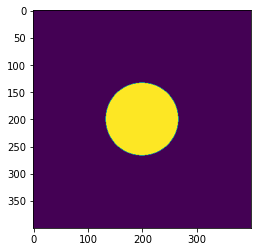

In [7]:
plt.imshow(np.array(phase).reshape(nx,ny))

In [8]:
Lv = 2350 # J / cm**3
Tm = 1728. # K
T = Variable(value=Tm)
enthalpy = Lv * (T - Tm) / Tm # J / cm**3

In [10]:
DiffusionTerm

fipy.terms.diffusionTerm.DiffusionTerm

In [17]:
delta = 1.5 * dx
sigma = 3.7e-5 # J / cm**2
beta = 0.33 # cm / (K s)
kappa = 6 * sigma * delta # J / cm
W = 6 * sigma / delta # J / cm**3
Mphi = Tm * beta / (6. * Lv * delta) # cm**3 / (J s)

In [18]:
displacement = L * 0.1

In [19]:
kappa_prime = numerix.array(((0.3*kappa, 0.), (0., kappa)))

In [20]:
mPhi = -((1 - 2 * phase) * W + 30 * phase * (1 - phase) * enthalpy)
dmPhidPhi = 2 * W - 30 * (1 - 2 * phase) * enthalpy
S1 = dmPhidPhi * phase * (1 - phase) + mPhi * (1 - 2 * phase)
S0 = mPhi * phase * (1 - phase) - S1 * phase
eq = TransientTerm(coeff=1/Mphi) == DiffusionTerm(coeff=kappa_prime) \
                         + S0 + ImplicitSourceTerm(coeff = S1)

In [21]:
T.setValue(T() - 1)

In [26]:
velocity = beta * abs(Tm - T()) # cm / s
timeStep = .1 * dx / velocity # s
elapsed = 0
traj = [np.array(phase),]
while elapsed < displacement / velocity:
    phase.updateOld()
    res = 1e+10
    while res > 1e-5:
        res = eq.sweep(var=phase, dt=timeStep)
    elapsed += timeStep
    traj.append(np.array(phase))
    

KeyboardInterrupt: 

In [27]:
tt1_x = np.array(traj[0]).reshape(nx,ny)[:,200]
tt2_x = np.array(traj[-1]).reshape(nx,ny)[:,200]
tt1_y = np.array(traj[0]).reshape(nx,ny)[200,:]
tt2_y = np.array(traj[-1]).reshape(nx,ny)[200,:]

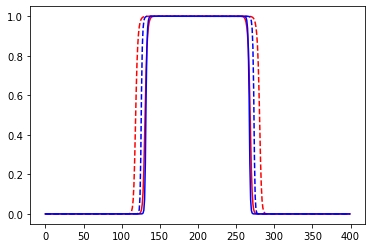

In [33]:
plt.plot(tt1_x,'-r')
plt.plot(tt2_x,'--r')
plt.plot(tt1_y,'-b')
plt.plot(tt2_y, '--b')

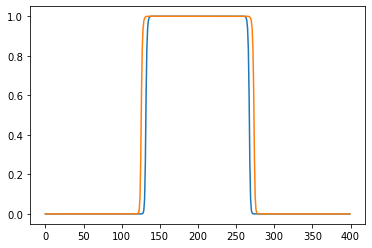

In [29]:
plt.plot(tt1_y)
plt.plot(tt2_y)